In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Problema 1
Desarrolle una función que permita hacer la binarización de una imagen, para realizarlo puede
 utilizar el enfoque que prefiera.

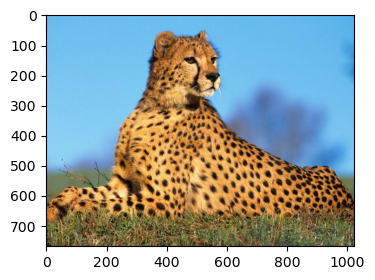

In [3]:
# Imagen que se usará para el problema 1
img_p1 = cv2.imread("Problema1/guepardo.jpg")
img_p1 = cv2.cvtColor(img_p1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,3))
plt.imshow(img_p1)
plt.show()

In [4]:
def AvGrayScale(img):
    # dimensiones de la imagen
    alto = img.shape[0]
    ancho = img.shape[1]
    # lienzos en blanco
    gris_pond=np.zeros((alto, ancho, 1))
    # se calcula el gris ponderado
    img_gris = img*[0.3, 0.59, 0.11]
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img_gris[i, j]
            gris_pond[i, j] = pixel.sum()
    return gris_pond

In [5]:
def binarize_img(img, umbral=0.5):
    umbral = umbral if umbral <= 1 else 1
    umbral = umbral if umbral >= 0 else 0.1
    img_gray = AvGrayScale(img)/255
    img_gray[img_gray < umbral] = 0
    img_gray[~(img_gray < umbral)] = 1
    return img_gray

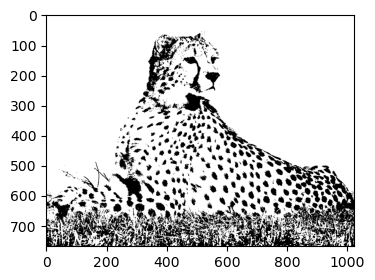

In [6]:
bin_img=binarize_img(img_p1, 0.4)
plt.figure(figsize=(5,3))
plt.imshow(bin_img, cmap='gray')
plt.show()

## Problema 2
Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR, XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

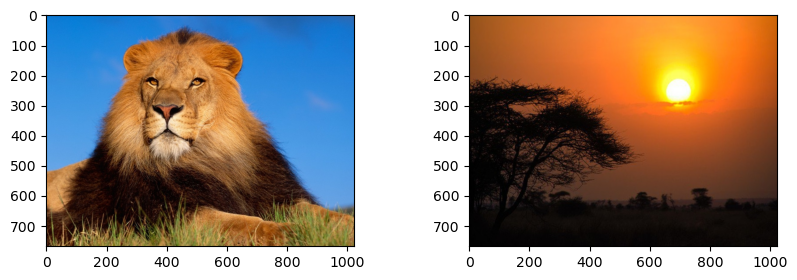

In [8]:
plt.figure(figsize=(10,3))
# Imagen1 que se usará para el problema 2
img1_p2 = cv2.imread("Problema2/leon.jpg")
img1_p2 = cv2.cvtColor(img1_p2, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(img1_p2)
# Imagen2 que se usará para el problema 2
img2_p2 = cv2.imread("Problema2/sol.jpg")
img2_p2 = cv2.cvtColor(img2_p2, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(img2_p2)

plt.show()

In [9]:
def imgOperations(img1, img2, umbral_img1=0.5, umbral_img2=0.5):
    # SUMA
    img_sum = (img1*0.5).astype('int') + (img2*0.5).astype('int')
    # RESTA
    img_resta = img1.astype('int') - img2.astype('int')
    img_resta[img_resta < 0] = 0
    # Binarización
    img1_bin = binarize_img(img1, umbral_img1)
    img1_bin_neg = (~img1_bin.astype('bool')).astype('int')
    img2_bin = binarize_img(img2, umbral_img2)
    img2_bin_neg = (~img2_bin.astype('bool')).astype('int')
    # AND
    img_and = img1_bin * img2_bin
    # OR
    img_or = img1_bin + img2_bin
    img_or[img_or > 1] = 1
    # XOR
    img_xor = img1_bin + img2_bin
    img_xor[img_xor > 1] = 0
    
    return img_sum, img_resta, img1_bin, img2_bin, img1_bin_neg, img2_bin_neg, img_and, img_or, img_xor

In [10]:
img_sum, img_resta, img1_bin, img2_bin, img1_bin_neg, img2_bin_neg, img_and, img_or, img_xor = imgOperations(img2_p2, img1_p2)

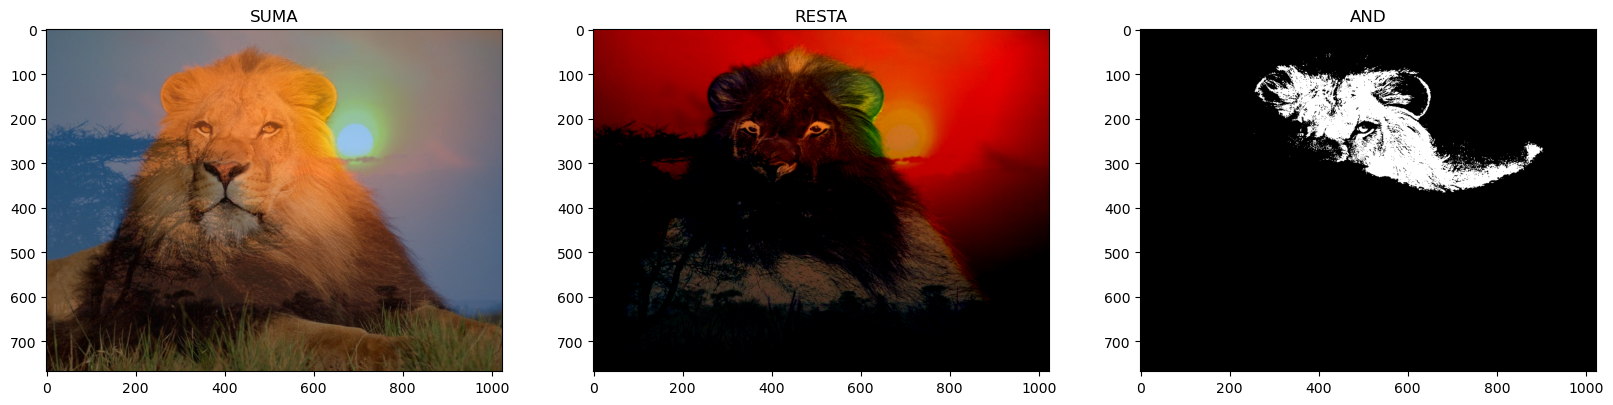

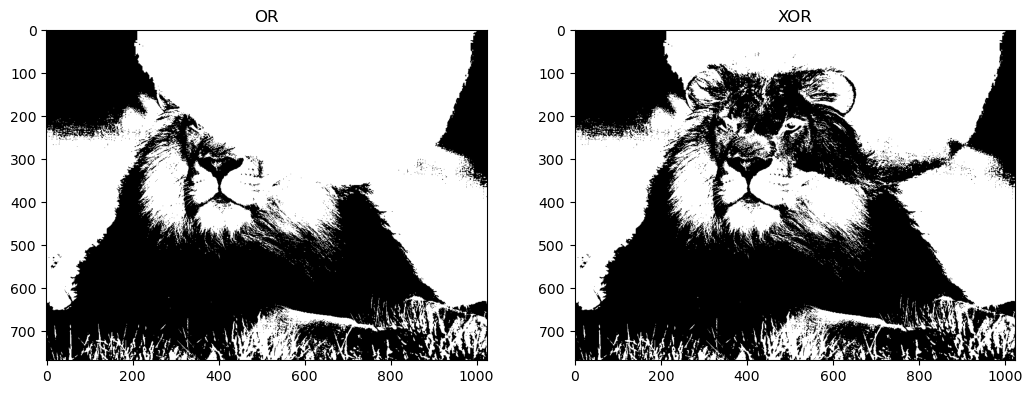

In [11]:
plt.figure(figsize=(20,5))
# SUMA
plt.subplot(1, 3, 1)
plt.imshow(img_sum)
plt.title('SUMA')
# RESTA
plt.subplot(1, 3, 2)
plt.imshow(img_resta)
plt.title('RESTA')
# AND
plt.subplot(1, 3, 3)
plt.imshow(img_and, cmap='gray')
plt.title('AND')
plt.show()

plt.figure(figsize=(12.5,5))
# OR
plt.subplot(1, 2, 1)
plt.imshow(img_or, cmap='gray')
plt.title('OR')
# XOR
plt.subplot(1, 2, 2)
plt.imshow(img_xor, cmap='gray')
plt.title('XOR')
plt.show()

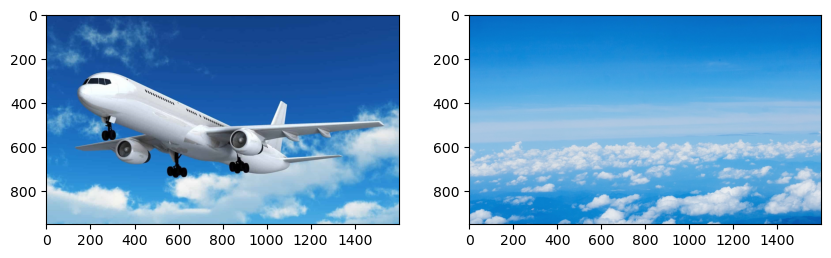

In [12]:
plt.figure(figsize=(10,3))
# Imagen3 que se usará para el problema 2
img3_p2 = cv2.imread("Problema2/avion.jpg")
img3_p2 = cv2.cvtColor(img3_p2, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(img3_p2)
# Imagen4 que se usará para el problema 2
img4_p2 = cv2.imread("Problema2/cielo.jpg")
img4_p2 = cv2.cvtColor(img4_p2, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(img4_p2)

plt.show()

In [13]:
img_sum, img_resta, img1_bin, img2_bin, img1_bin_neg, img2_bin_neg, img_and, img_or, img_xor = imgOperations(img3_p2, img4_p2)

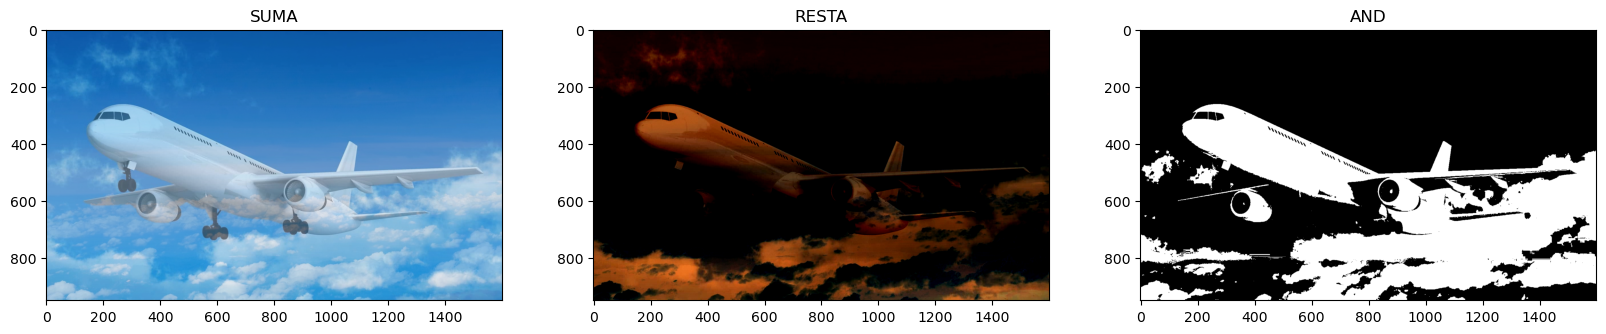

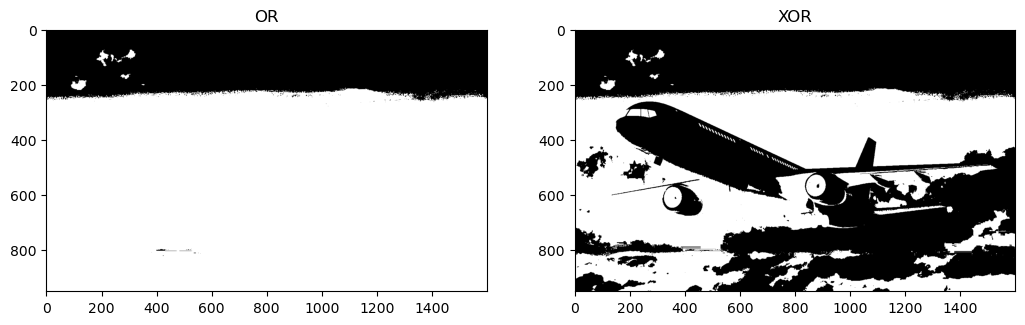

In [14]:
plt.figure(figsize=(20,5))
# SUMA
plt.subplot(1, 3, 1)
plt.imshow(img_sum)
plt.title('SUMA')
# RESTA
plt.subplot(1, 3, 2)
plt.imshow(img_resta)
plt.title('RESTA')
# AND
plt.subplot(1, 3, 3)
plt.imshow(img_and, cmap='gray')
plt.title('AND')
plt.show()

plt.figure(figsize=(12.5,5))
# OR
plt.subplot(1, 2, 1)
plt.imshow(img_or, cmap='gray')
plt.title('OR')
# XOR
plt.subplot(1, 2, 2)
plt.imshow(img_xor, cmap='gray')
plt.title('XOR')
plt.show()

## Problema 3
Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

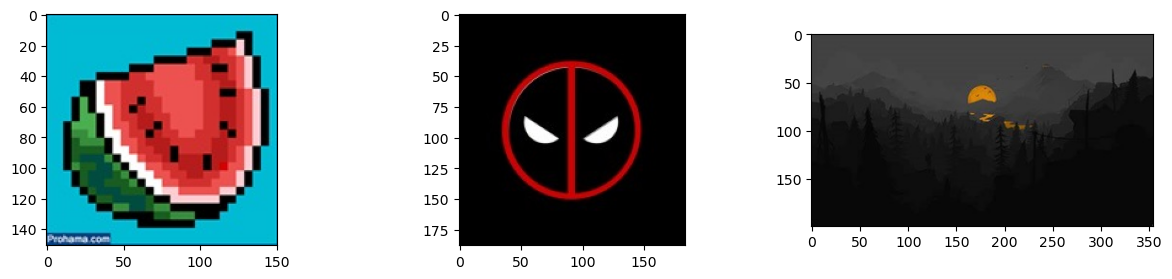

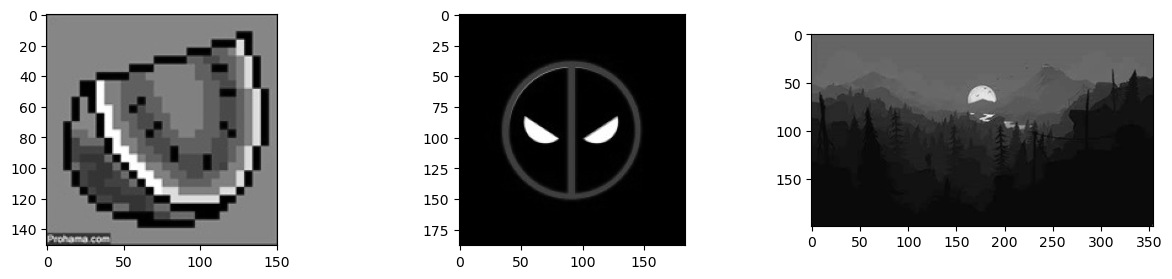

In [16]:
plt.figure(figsize=(15,3))
# Imagen1 que se usará para el problema 3
img1_p3 = cv2.imread("Problema3/sandia.jpg")
img1_p3 = cv2.cvtColor(img1_p3, cv2.COLOR_BGR2RGB)
plt.subplot(1, 3, 1)
plt.imshow(img1_p3)
# Imagen2 que se usará para el problema 3
img2_p3 = cv2.imread("Problema3/deadpool.jpg")
img2_p3 = cv2.cvtColor(img2_p3, cv2.COLOR_BGR2RGB)
plt.subplot(1, 3, 2)
plt.imshow(img2_p3)
# Imagen3 que se usará para el problema 3
img3_p3 = cv2.imread("Problema3/paisaje.jpg")
img3_p3 = cv2.cvtColor(img3_p3, cv2.COLOR_BGR2RGB)
plt.subplot(1, 3, 3)
plt.imshow(img3_p3)
plt.show()

# CONVERSIÓN A GRISES
plt.figure(figsize=(15,3))
# Imagen1 que se usará para el problema 3 en gris
img1_p3_gray = AvGrayScale(img1_p3)
plt.subplot(1, 3, 1)
plt.imshow(img1_p3_gray, cmap='gray')
# Imagen2 que se usará para el problema 3 en gris
img2_p3_gray = AvGrayScale(img2_p3)
plt.subplot(1, 3, 2)
plt.imshow(img2_p3_gray, cmap='gray')
# Imagen3 que se usará para el problema 3 en gris
img3_p3_gray = AvGrayScale(img3_p3)
plt.subplot(1, 3, 3)
plt.imshow(img3_p3_gray, cmap='gray')
plt.show()

In [17]:
def img3d(img):
    # DIMENSIONES DE LA IMG
    n = img.shape[0]
    m = img.shape[1]
    # CREACIÓN DE EJES
    x_size = np.arange(0, m, 1)
    y_size = np.arange(0, n, 1)
    # Se apila el vector de dimensión del ancho m veces y se aplana
    x = np.tile(x_size, (n, 1)).flatten()
    # Se apila el vector de dimensión del alto n veces y se aplana
    y = np.tile(y_size, (m, 1)).transpose().flatten()
    z = 0
    # Ancho de barras
    dx = dy = 1
    # Altura de las barras
    dz = img.reshape(n*m)
    # GRÁFICO DE BARRAS 3D
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
    ax.bar3d(x, -y, z, dx, dy, dz, shade=True, zsort='max', color='gray')
    ax.set_xlabel('Ancho')
    ax.set_ylabel('Alto')
    plt.title('IMAGEN 3D')
    
    plt.show()

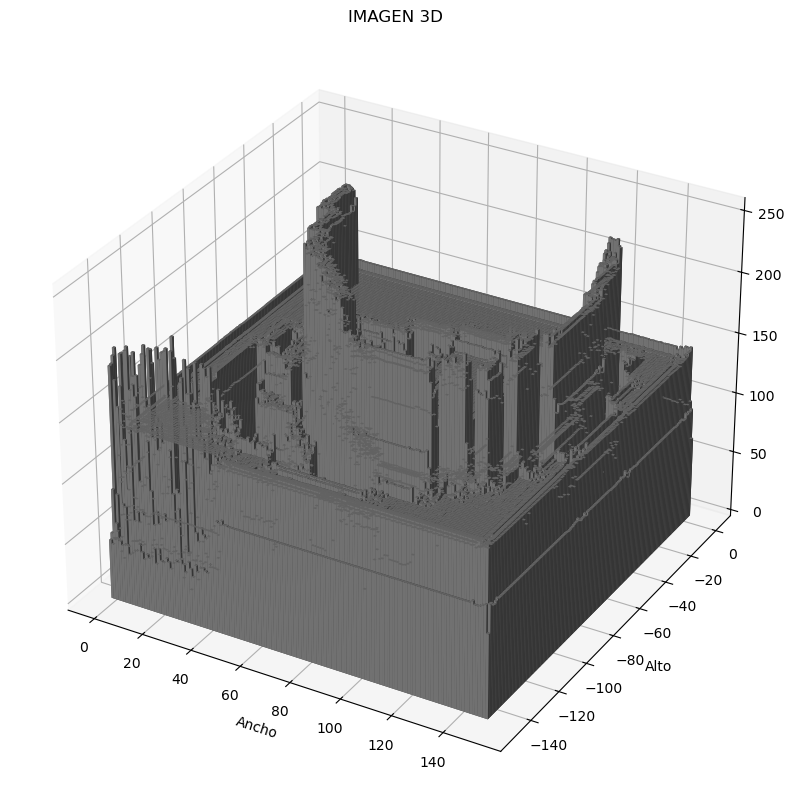

In [18]:
img3d(img1_p3_gray)

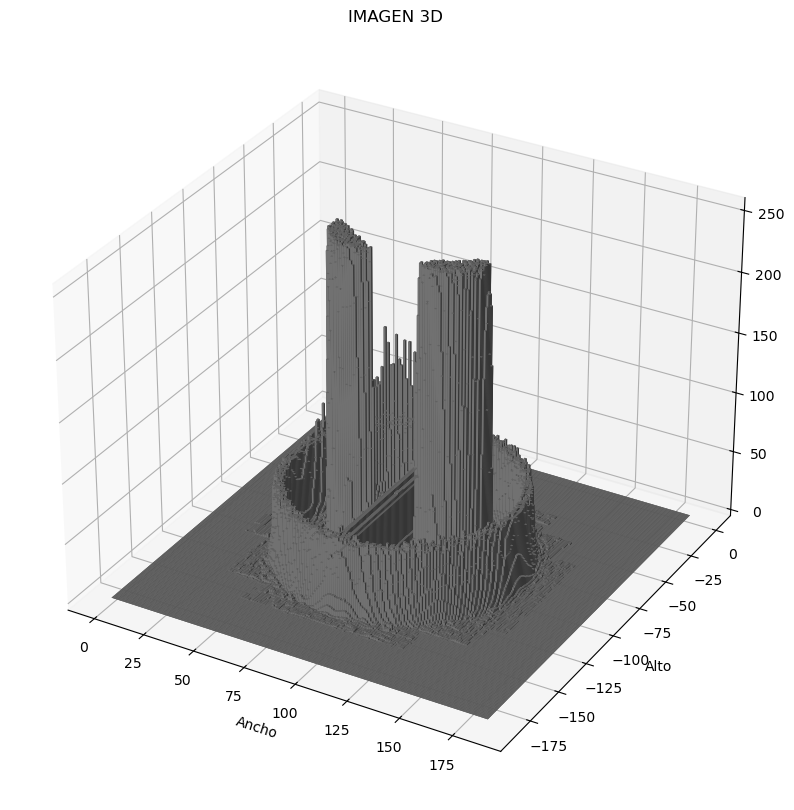

In [19]:
img3d(img2_p3_gray)

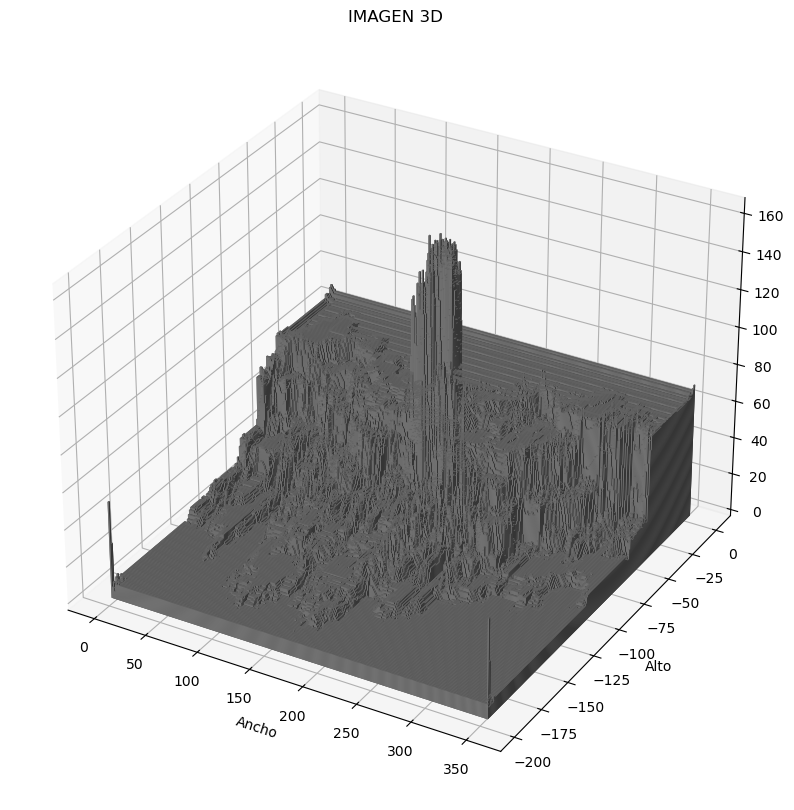

In [20]:
img3d(img3_p3_gray)

## Problema 4
Implemente una función para cada una de las trasformaciones vistas en clase: negativa, lineal,  logarítmica y exponencial.

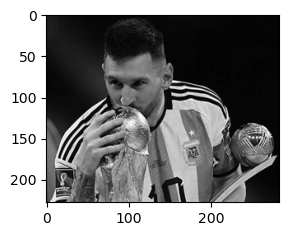

In [22]:
# Imagen que se usará para el problema 4
img1_p4 = cv2.imread("Problema4/messi.jpg")
img1_p4 = cv2.cvtColor(img1_p4, cv2.COLOR_BGR2RGB)
img1_p4 = AvGrayScale(img1_p4)
plt.figure(figsize=(3,3))
plt.imshow(img1_p4, cmap='gray')
plt.show()

In [23]:
def transfNeg(img):
    # DIMENSIONES DE LA IMG
    n = img.shape[0]
    m = img.shape[1]
    # APLANACIÓN DE IMAGEN
    img = img.reshape(n*m)
    # APLICACIÓN DE TRANSFORMACIÓN
    s = 255 - img
    # REDIMENSIONAMIENTO DE IMAGEN
    img_new = s.reshape(n,m,1)
    return img_new

In [24]:
def transfLin(img, alpha, beta):
    # DIMENSIONES DE LA IMG
    n = img.shape[0]
    m = img.shape[1]
    # APLANACIÓN DE IMAGEN
    img = img.reshape(n*m)
    # APLICACIÓN DE TRANSFORMACIÓN
    s = img*alpha + beta
    s[s > 255] = 255
    s[s < 0] = 0
    s = s.astype('uint8')
    # REDIMENSIONAMIENTO DE IMAGEN
    img_new = s.reshape(n,m,1)
    return img_new

In [25]:
def transfLog(img, alpha):
    # DIMENSIONES DE LA IMG
    n = img.shape[0]
    m = img.shape[1]
    # APLANACIÓN DE IMAGEN
    img = img.reshape(n*m)
    # NORMALIZACIÓN DE r
    img = img/255
    # APLICACIÓN DE TRANSFORMACIÓN
    s = alpha*np.log(1 + img)
    s[s > 1] = 1
    s[s < 0] = 0
    s = s.astype('uint8')
    # REDIMENSIONAMIENTO DE IMAGEN
    img_new = s.reshape(n,m,1)
    return img_new

In [26]:
def transfExp(img, alpha, gamma):
    gamma = gamma if gamma >= 0 else 0
    # DIMENSIONES DE LA IMG
    n = img.shape[0]
    m = img.shape[1]
    # APLANACIÓN DE IMAGEN
    img = img.reshape(n*m)
    # NORMALIZACIÓN DE r
    img = img/255
    # APLICACIÓN DE TRANSFORMACIÓN
    s = alpha*img**gamma
    s[s > 1] = 1
    s[s < 0] = 0
    s = s.astype('uint8')
    # REDIMENSIONAMIENTO DE IMAGEN
    img_new = s.reshape(n,m,1)
    return img_new

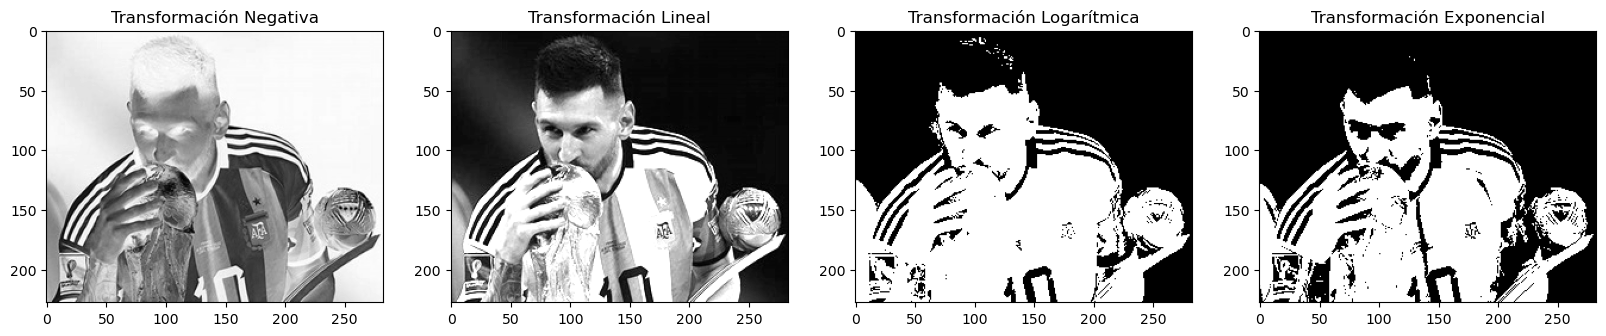

In [27]:
plt.figure(figsize=(20,5))
# NEGATIVA
plt.subplot(1, 4, 1)
img1_p4_neg = transfNeg(img1_p4)
plt.imshow(img1_p4_neg, cmap='gray')
plt.title('Transformación Negativa')
# LINEAL
plt.subplot(1, 4, 2)
img1_p4_lin = transfLin(img1_p4, 1.35, 55)
plt.imshow(img1_p4_lin, cmap='gray')
plt.title('Transformación Lineal')
# LOG
plt.subplot(1, 4, 3)
img1_p4_log = transfLog(img1_p4, 6)
plt.imshow(img1_p4_log, cmap='gray')
plt.title('Transformación Logarítmica')
# EXP
plt.subplot(1, 4, 4)
img1_p4_exp = transfExp(img1_p4, 10, 2)
plt.imshow(img1_p4_exp, cmap='gray')
plt.title('Transformación Exponencial')
plt.show()

## Problema 5
Desarrolle una función que dada una imagen a color, cualquier kernel con cualquier dimensión (3X3, 5X5, 7X7, 9X9, 11X11) y cualquier tipo (gaussiano, Sobel, Sharp, unsharp, laplaciano), aplique un filtro de convolución a dicha imagen y muestre la imagen original y la imagen filtrada. Le recomendamos implementar el kernel como un arreglo de numpy.

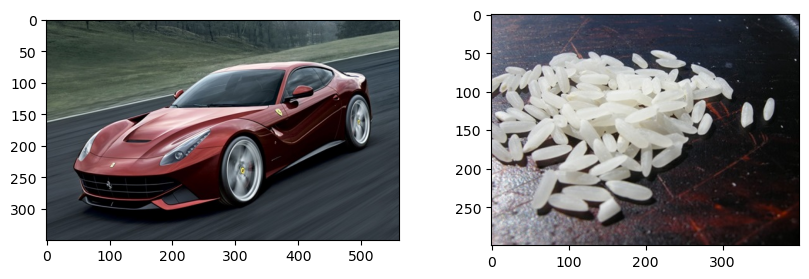

In [29]:
plt.figure(figsize=(10,3))
# Imagen1 que se usará para el problema 5
img1_p5 = cv2.imread("Problema5/carro.jpg")
img1_p5 = cv2.cvtColor(img1_p5, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(img1_p5, cmap='gray')
# Imagen2 que se usará para el problema 5
img2_p5 = cv2.imread("Problema5/arroz.jpg")
img2_p5 = cv2.cvtColor(img2_p5, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(img2_p5, cmap='gray')
plt.show()

In [30]:
kernel_laplaciano_3x3 = np.array([[0, -1, 0], 
                                  [-1, 4,-1], 
                                  [0, -1, 0]])
kernel_laplaciano_5x5 = np.array([[0, 0, -1, 0, 0],
                                  [0, -1, -2, -1, 0],
                                  [-1, -2, 16, -2, -1],
                                  [0, -1, -2, -1, 0],
                                  [0, 0, -1, 0, 0]])
kernel_laplaciano_7x7 = np.array([[0, 0,  0, -1,  0,  0,  0],
                                  [0, 0, -1, -2, -1,  0,  0],
                                  [0, -1, -2, -3, -2, -1,  0],
                                  [-1, -2, -3, 48, -3, -2, -1],
                                  [0, -1, -2, -3, -2, -1,  0],
                                  [0, 0, -1, -2, -1,  0,  0],
                                  [0, 0,  0, -1,  0,  0,  0]])

In [31]:
kernel_gaussiano_3x3 = np.array([[1, 2, 1],
                                 [2, 4, 2],
                                 [1, 2, 1]]) / 16
kernel_gaussiano_5x5 = np.array([[1,  4,  6,  4, 1],
                                 [4, 16, 24, 16, 4],
                                 [6, 24, 36, 24, 6],
                                 [4, 16, 24, 16, 4],
                                 [1,  4,  6,  4, 1]]) / 256
kernel_gaussiano_7x7 = np.array([[1,  6,  15,  20,  15,  6,  1],
                                 [6,  36, 90, 120, 90, 36,  6],
                                 [15, 90, 225, 300, 225, 90, 15],
                                 [20, 120, 300, 400, 300, 120, 20],
                                 [15, 90, 225, 300, 225, 90, 15],
                                 [6,  36,  90, 120, 90, 36,  6],
                                 [1,  6,  15,  20,  15,  6,  1]]) / 4096

In [32]:
def channelsSplit(img):
    # dimensiones de la imagen
    alto = img.shape[0]
    ancho = img.shape[1]
    # lienzos en blanco
    r =  np.zeros((alto, ancho))
    g = np.zeros((alto, ancho))
    b = np.zeros((alto, ancho))
    # se separan los colores
    img_r = img*[1, 0, 0]
    img_g = img*[0, 1, 0]
    img_b = img*[0, 0, 1]
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel_r = img_r[i, j]
            pixel_g = img_g[i, j]
            pixel_b = img_b[i, j]
            r[i, j] = pixel_r.sum()
            g[i, j] = pixel_g.sum()
            b[i, j] = pixel_b.sum()
    return r, g, b

In [33]:
def channelsMerge(r, g, b):
    # dimensiones de la imagen
    alto = r.shape[0]
    ancho = r.shape[1]
    # lienzo en blanco
    img =  np.zeros((alto, ancho, 3))
    # se unen los canales
    for i in range(0, alto):
        for j in range(0, ancho):
            img[i, j] = [r[i, j], g[i, j], b[i, j]]
    return img.astype('uint8')

In [34]:
def convFilter(img, kernel):
    # Dimensiones
    n_img = img.shape[0]
    m_img = img.shape[1]
    dim_k = kernel.shape[0]
    # Separación de canales
    r, g, b = channelsSplit(img)
    # Conversión a escala de grises
    img_bw = AvGrayScale(img)
    img_bw = img_bw.reshape(n_img, m_img)
    # Lienzos en blanco
    redSketch = np.ones_like(r)
    greenSketch = np.ones_like(g)
    blueSketch = np.ones_like(b)
    graySketch = np.ones_like(img_bw)
    # Borde
    borde = dim_k//2
    # Iteraciones
    for i in range(n_img-2*borde):
        for j in range(m_img-2*borde):
            # Se toma un segmento de la imagen o canal de dim_k x dim_k
            imgGraySegment = img_bw[i:dim_k+i, j:dim_k+j]
            imgRedSegment = r[i:dim_k+i, j:dim_k+j]
            imgGreenSegment = g[i:dim_k+i, j:dim_k+j]
            imgBlueSegment = b[i:dim_k+i, j:dim_k+j]
            # Valor de convolución
            convGrayValue = (imgGraySegment*kernel).sum()
            convRedValue = (imgRedSegment*kernel).sum()
            convGreenValue = (imgGreenSegment*kernel).sum()
            convBlueValue = (imgBlueSegment*kernel).sum()
            # Matriz de convolución
            convGrayMatrix = np.ones((dim_k, dim_k))
            convGrayMatrix[borde, borde] = convGrayValue
            convRedMatrix = np.ones((dim_k, dim_k))
            convRedMatrix[borde, borde] = convRedValue
            convGreenMatrix = np.ones((dim_k, dim_k))
            convGreenMatrix[borde, borde] = convGreenValue
            convBlueMatrix = np.ones((dim_k, dim_k))
            convBlueMatrix[borde, borde] = convBlueValue
            # Imagen convolucionada
            graySketch[i:dim_k+i, j:dim_k+j] = graySketch[i:dim_k+i, j:dim_k+j]*convGrayMatrix
            redSketch[i:dim_k+i, j:dim_k+j] = redSketch[i:dim_k+i, j:dim_k+j]*convRedMatrix
            greenSketch[i:dim_k+i, j:dim_k+j] = greenSketch[i:dim_k+i, j:dim_k+j]*convGreenMatrix
            blueSketch[i:dim_k+i, j:dim_k+j] = blueSketch[i:dim_k+i, j:dim_k+j]*convBlueMatrix
    # Valores límite
    graySketch[graySketch > 255] = 255
    graySketch[graySketch < 0] = 0
    redSketch[redSketch > 255] = 255
    redSketch[redSketch < 0] = 0
    greenSketch[greenSketch > 255] = 255
    greenSketch[greenSketch < 0] = 0
    blueSketch[blueSketch > 255] = 255
    blueSketch[blueSketch < 0] = 0

    # Conversión de tipo de dato
    graySketch = graySketch.astype('uint8')
    redSketch = redSketch.astype('uint8')
    greenSketch = greenSketch.astype('uint8')
    blueSketch = blueSketch.astype('uint8')

    # Unión de canales
    rgbSketch = channelsMerge(redSketch, greenSketch, blueSketch)
    # Gráfica de resultado
    plt.figure(figsize=(15,3))
    # Imagen Original
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Imagen Original')
    # Imagen Filtrada a color
    plt.subplot(1, 3, 2)
    plt.imshow(rgbSketch)
    plt.title('Imagen Filtrada a color')
    # Imagen filtrada a blanco y negro
    plt.subplot(1, 3, 3)
    plt.imshow(graySketch, cmap='gray')
    plt.title('Imagen Filtrada a  blanco y negro')
    plt.show()
    return graySketch, rgbSketch

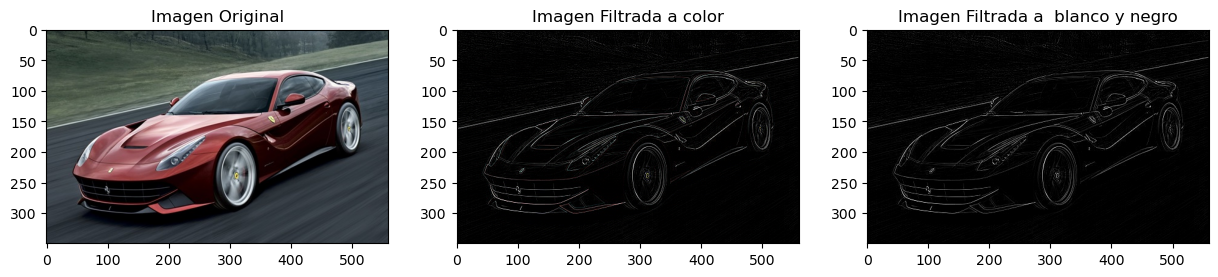

In [35]:
g,c=convFilter(img1_p5, kernel_laplaciano_3x3)

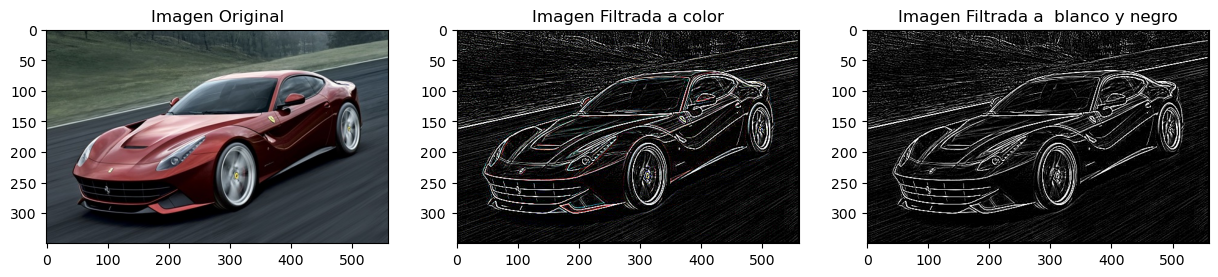

In [36]:
g,c=convFilter(img1_p5, kernel_laplaciano_5x5)

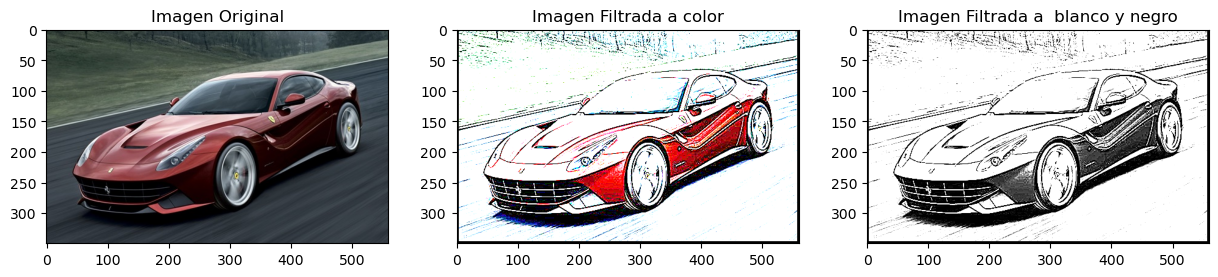

In [37]:
g,c=convFilter(img1_p5, kernel_laplaciano_7x7)

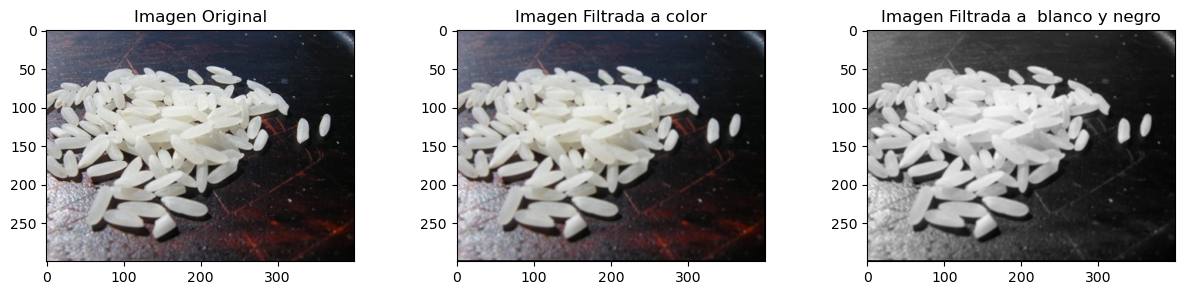

In [38]:
g,c=convFilter(img2_p5, kernel_gaussiano_3x3)

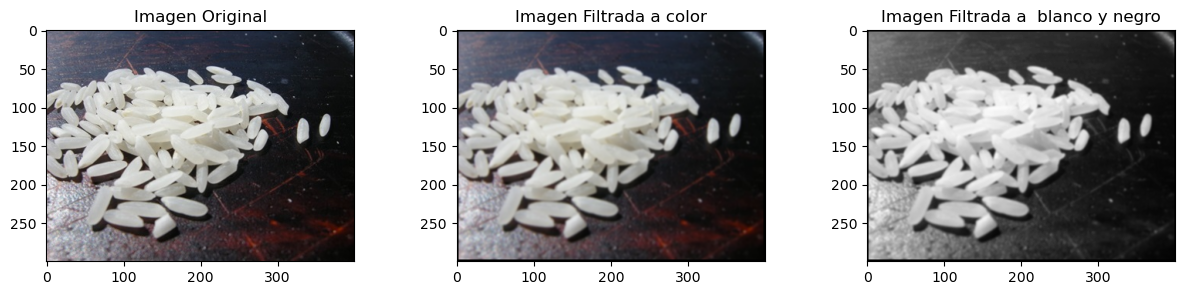

In [39]:
g,c=convFilter(img2_p5, kernel_gaussiano_5x5)

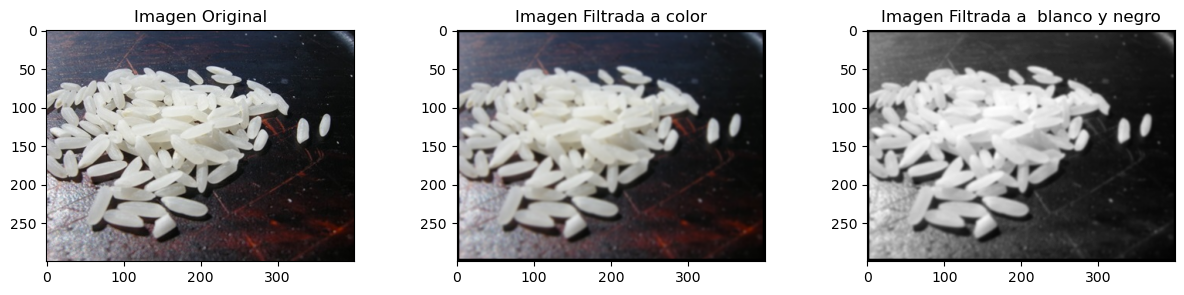

In [40]:
g,c=convFilter(img2_p5, kernel_gaussiano_7x7)

## Problema 6
Investigue que hace el kernel Laplaciano y cómo este enfoque se diferencia de usar el algoritmo de Canny para la detección de bordes.

- El kernel Laplaciano también se emplea para detección de bordes.
- Emplea la divergencia del gradiente, que es lo mismo que la traza de la matriz Hessiana, es decir, emplea las segundas derivadas parciales para la detección de los bordes.
- Esa es la principal diferencia entre el algoritmo de Canny y el Laplaciano: Canny usa primeras derivadas y el Laplaciano las segundas.
- Entre los kernels comunes del Laplaciano se encuentran las siguientes
$$\text{Laplaciano 3x3} = 
\begin{bmatrix}
0 & -1 & 0\\
-1 & 4 & -1\\
0 & -1 & 0
\end{bmatrix}
$$

$$\text{Laplaciano 5x5} = 
\begin{bmatrix}
0 & 0 & -1 & 0 & 0\\
0 & -1 & -2 & -1 & 0\\
-1 & -2 & 16 & -2 & -1\\
0 & -1 & -2 & -1 & 0\\
0 & 0 & -1 & 0 & 0
\end{bmatrix}
$$

$$\text{Laplaciano 7x7} = 
\begin{bmatrix}
0 &  0 &  0 & -1 &  0 &  0 &  0 \\
0 &  0 & -1 & -2 & -1 &  0 &  0 \\
0 & -1 & -2 & -3 & -2 & -1 &  0 \\
-1 & -2 & -3 & 48 & -3 & -2 & -1 \\
0 & -1 & -2 & -3 & -2 & -1 &  0 \\
0 &  0 & -1 & -2 & -1 &  0 &  0 \\
0 &  0 &  0 & -1 &  0 &  0 &  0 \\
\end{bmatrix}
$$